In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from typing import Dict, List, Optional, Sequence, Tuple
import collections
import datetime
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi

from IPython import display
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
# Creating the required variables
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

In [13]:
# Setting the path and loading the data
data_dir = pathlib.Path('samples/Basic Beats')

filenames = glob.glob(str(data_dir/'*.mid*'))
print('Number of files:', len(filenames))

Number of files: 10


In [26]:
# Extracting the notes from the sample MIDI file
def midi_to_notes(midi_file: str) -> pd.DataFrame:
    pm = pretty_midi.PrettyMIDI(midi_file)
    instrument = pm.instruments[0]
    notes = collections.defaultdict(list)

    # Sort the notes by start time
    sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
    prev_start = sorted_notes[0].start

    for note in sorted_notes:
        start = note.start
        end = note.end
        notes['pitch'].append(note.pitch)
        notes['start'].append(start)
        notes['end'].append(end)
        notes['step'].append(start - prev_start)
        notes['duration'].append(end - start)
        prev_start = start

    df = pd.DataFrame({name: np.array(value) for name, value in notes.items()})
    df.name = midi_file
    return df

sample_file = filenames[0]
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,42,0.000000,0.088663,0.000000,0.088663
1,36,0.000000,0.172965,0.000000,0.172965
2,42,0.174419,0.263081,0.174419,0.088663
3,42,0.348837,0.437500,0.174419,0.088663
4,38,0.348837,0.521802,0.000000,0.172965


In [27]:
# Converting to note names by considering the respective pitch values

get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
# Visualizing the paramaters of the muscial notes of the piano

def plot_piano_roll(notes: pd.DataFrame, count: int | None = None):
    if count:
        title = f'{notes.name}: First {count} notes'
    else:
        title = f'{notes.name}: Whole track'
        count = len(notes['pitch'])

        plt.figure(figsize=(20, 4))
        plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
        plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)

        plt.plot(plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
        plt.xlabel('Time [s]')
        plt.ylabel('Pitch')
        _ = plt.title(title)

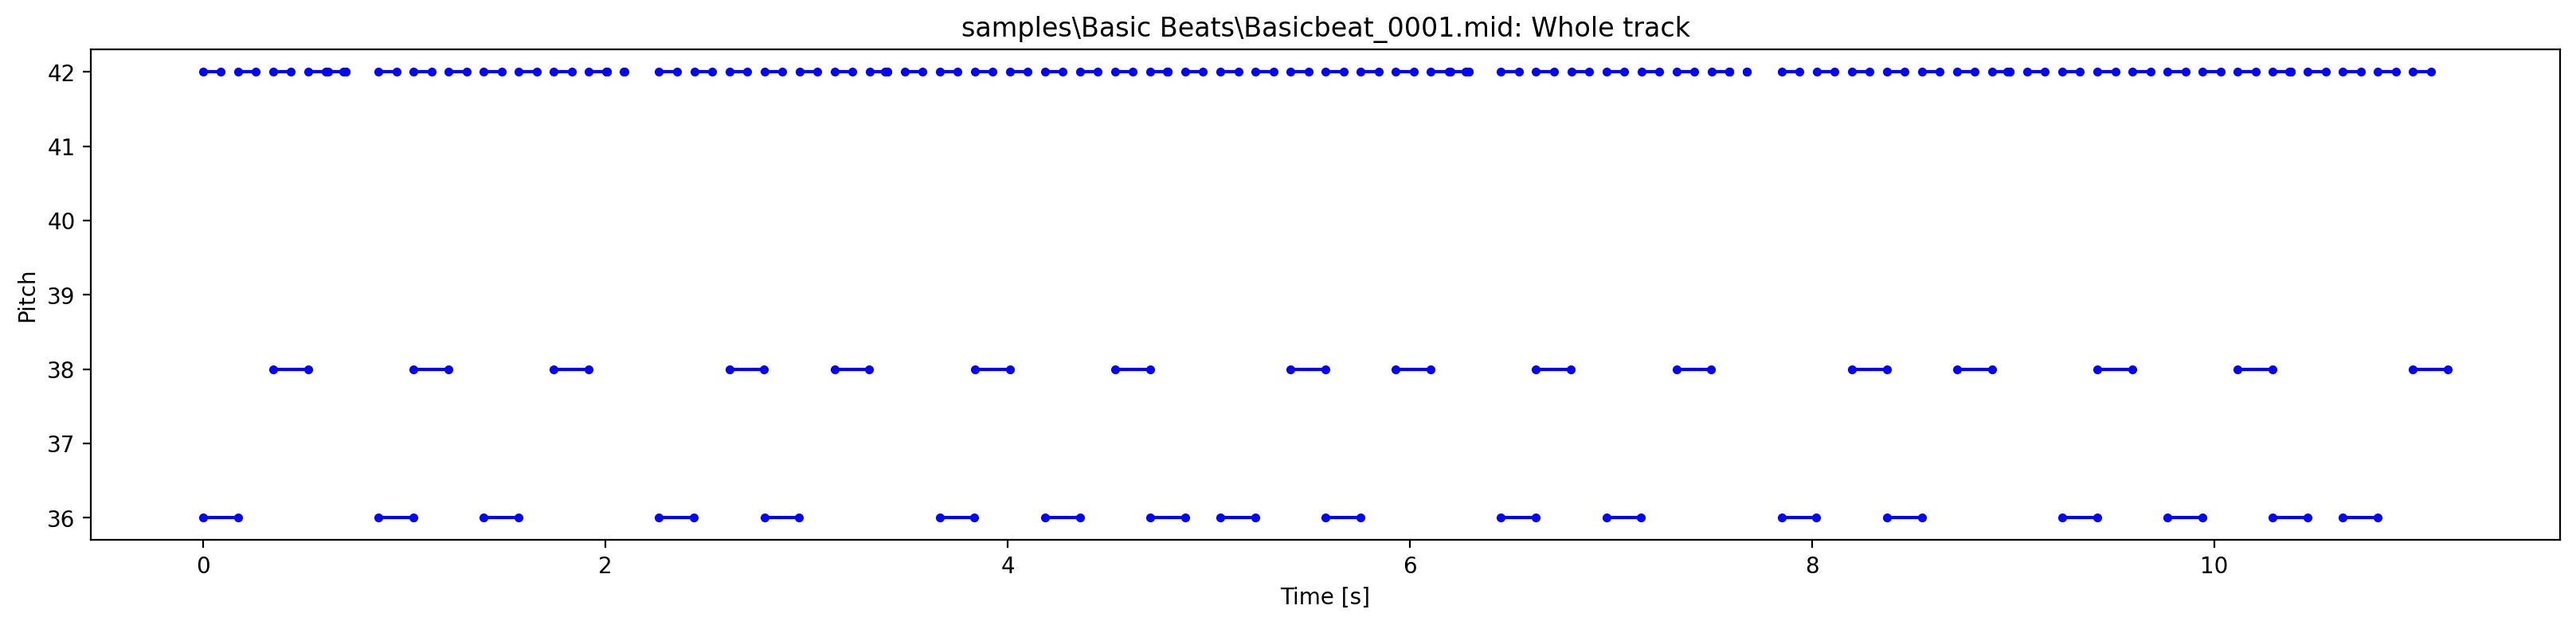

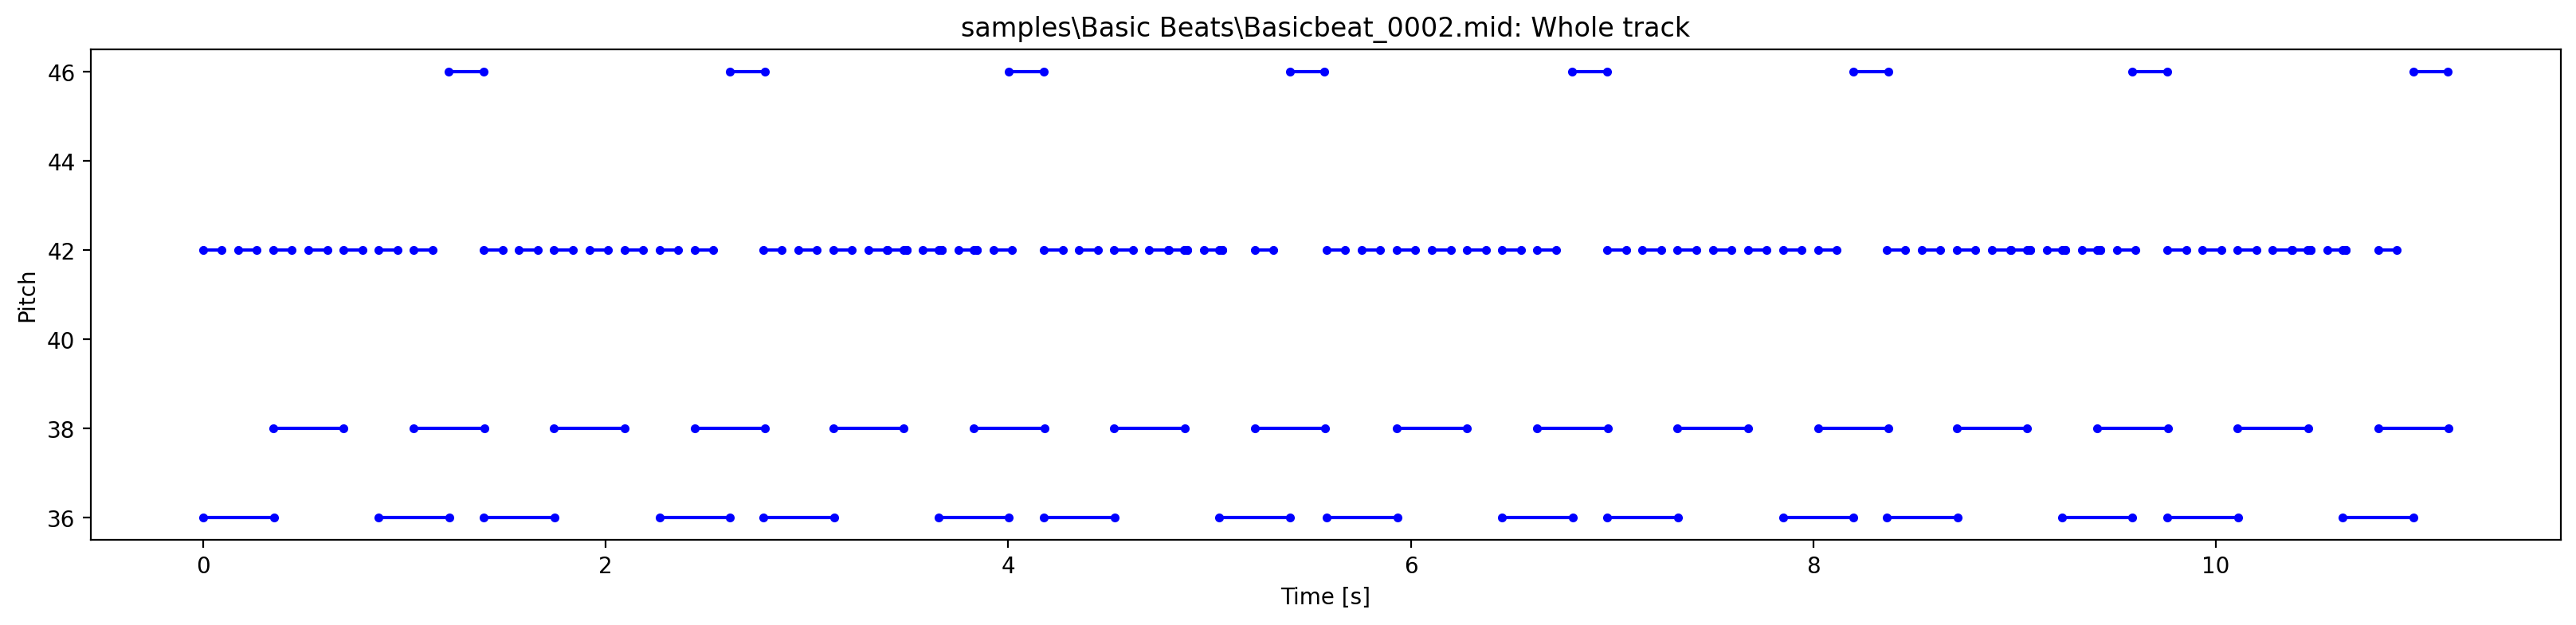

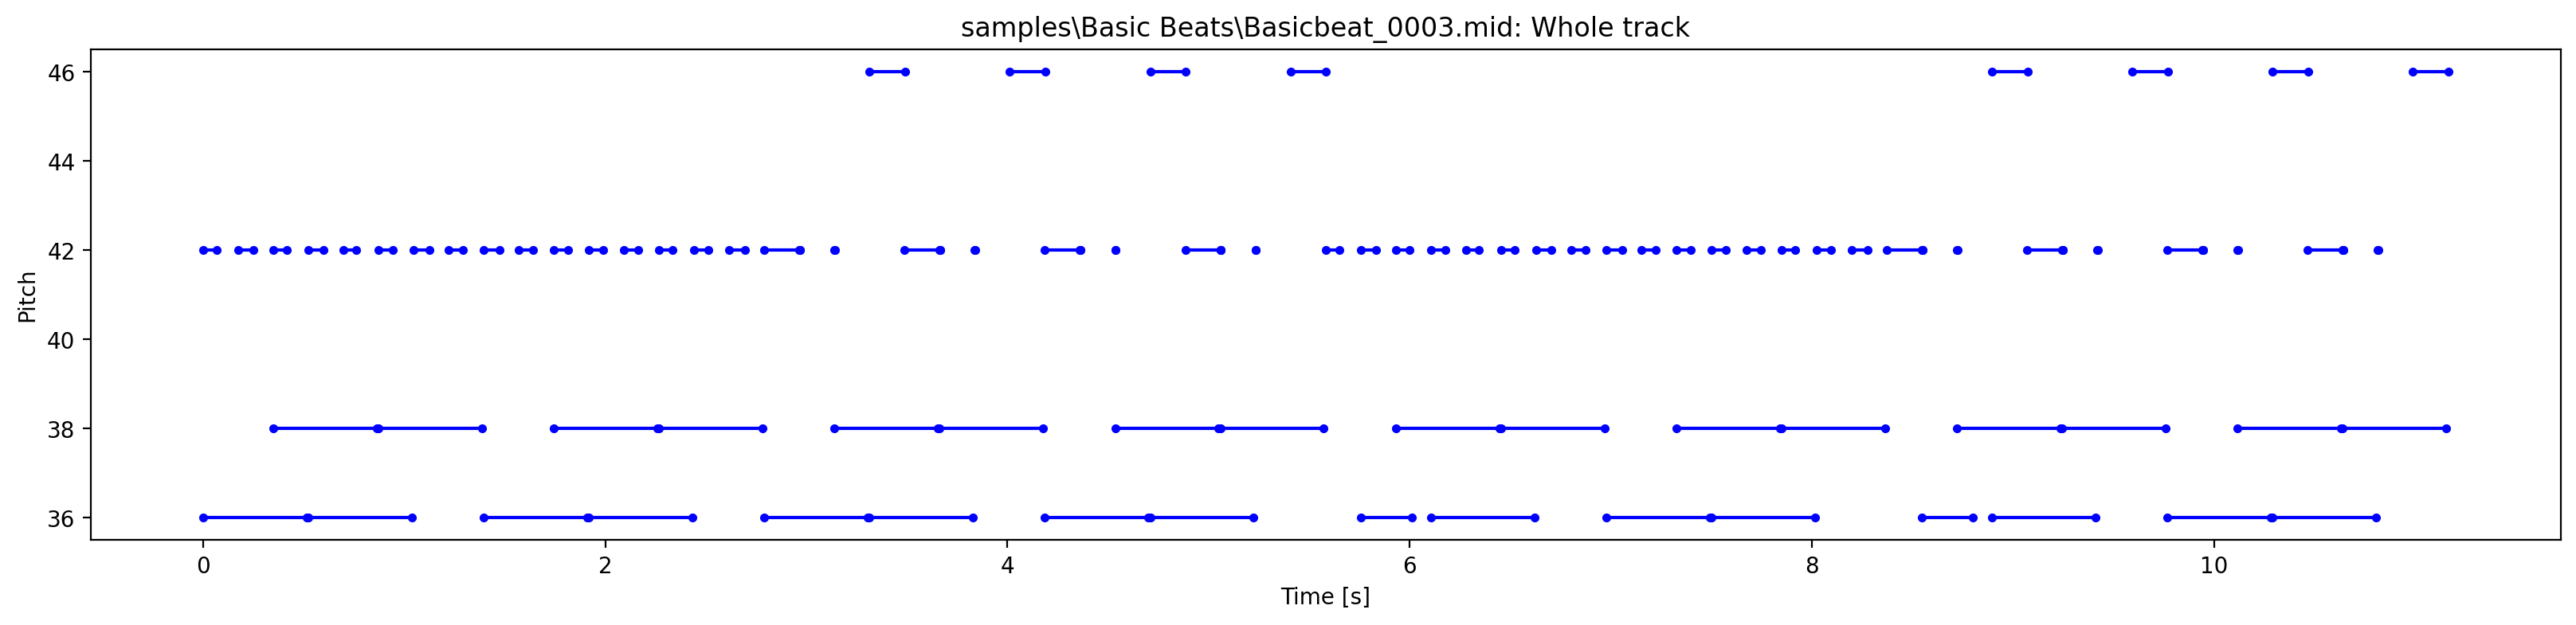

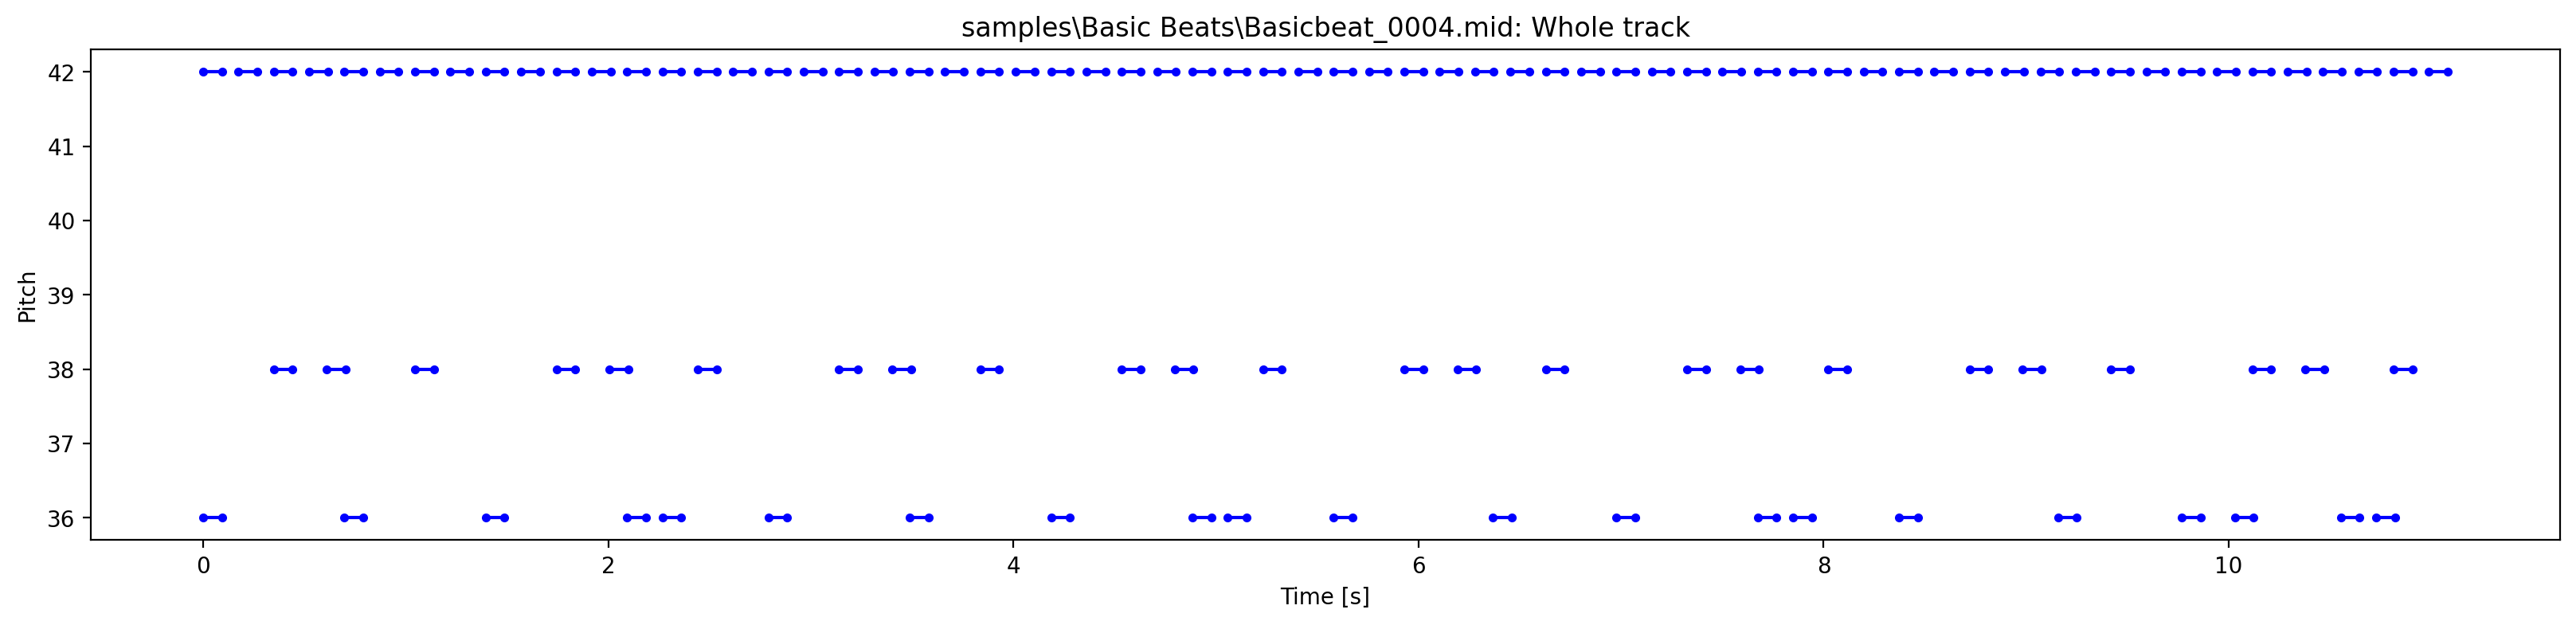

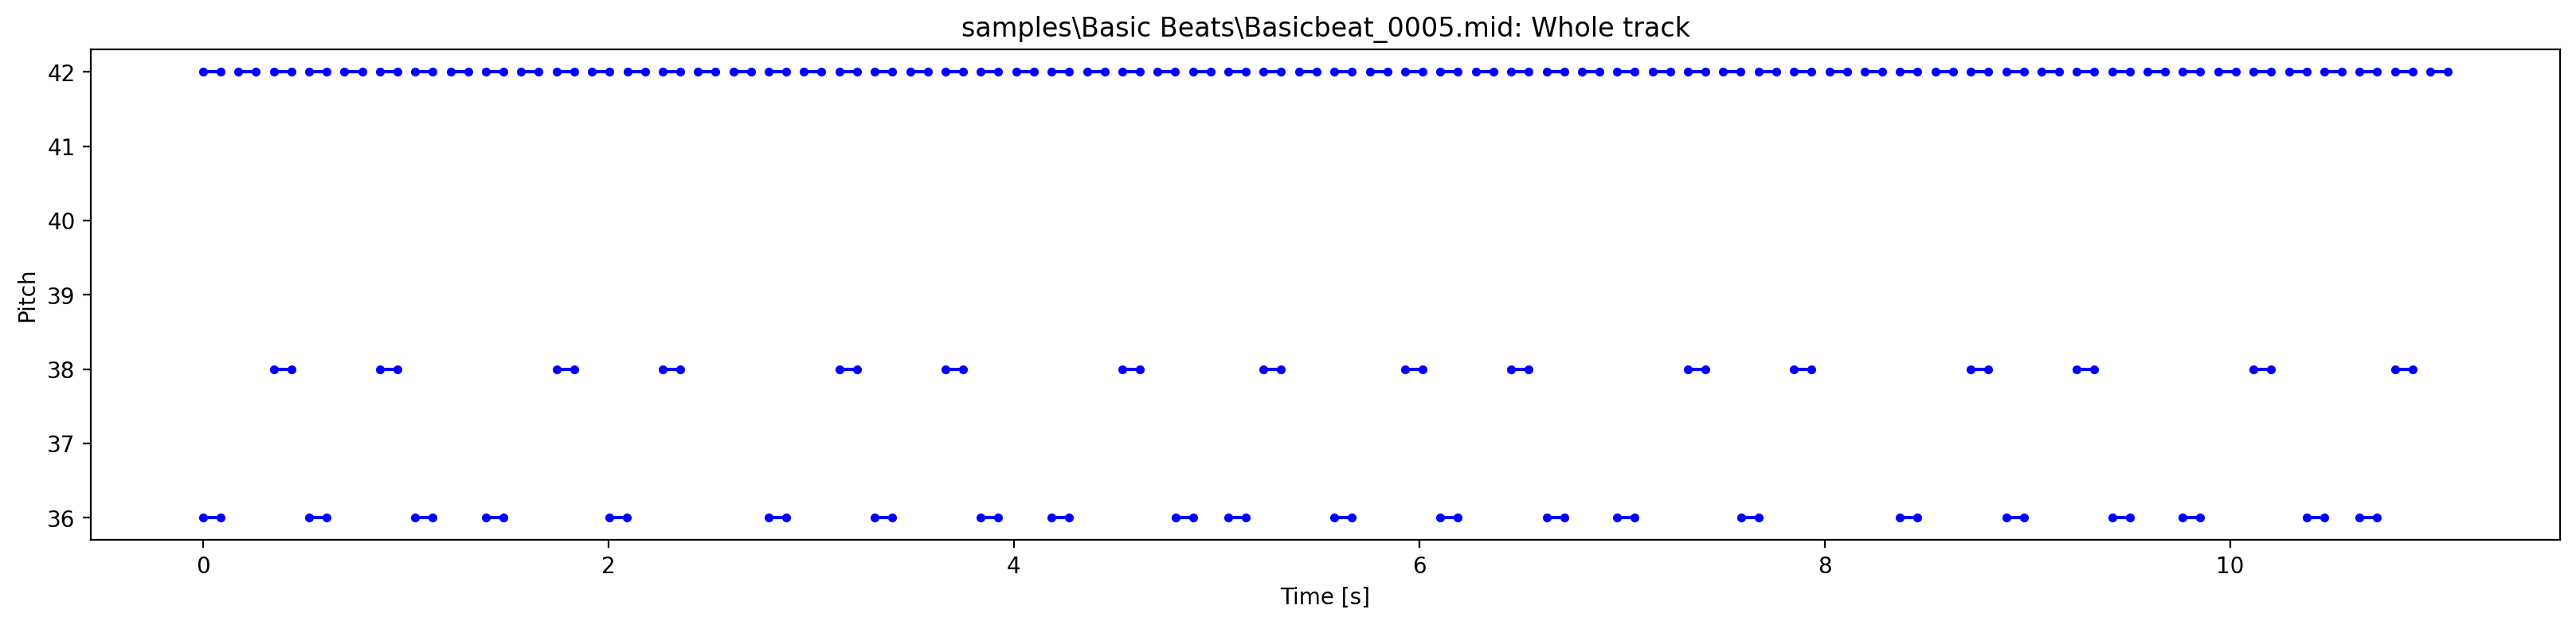

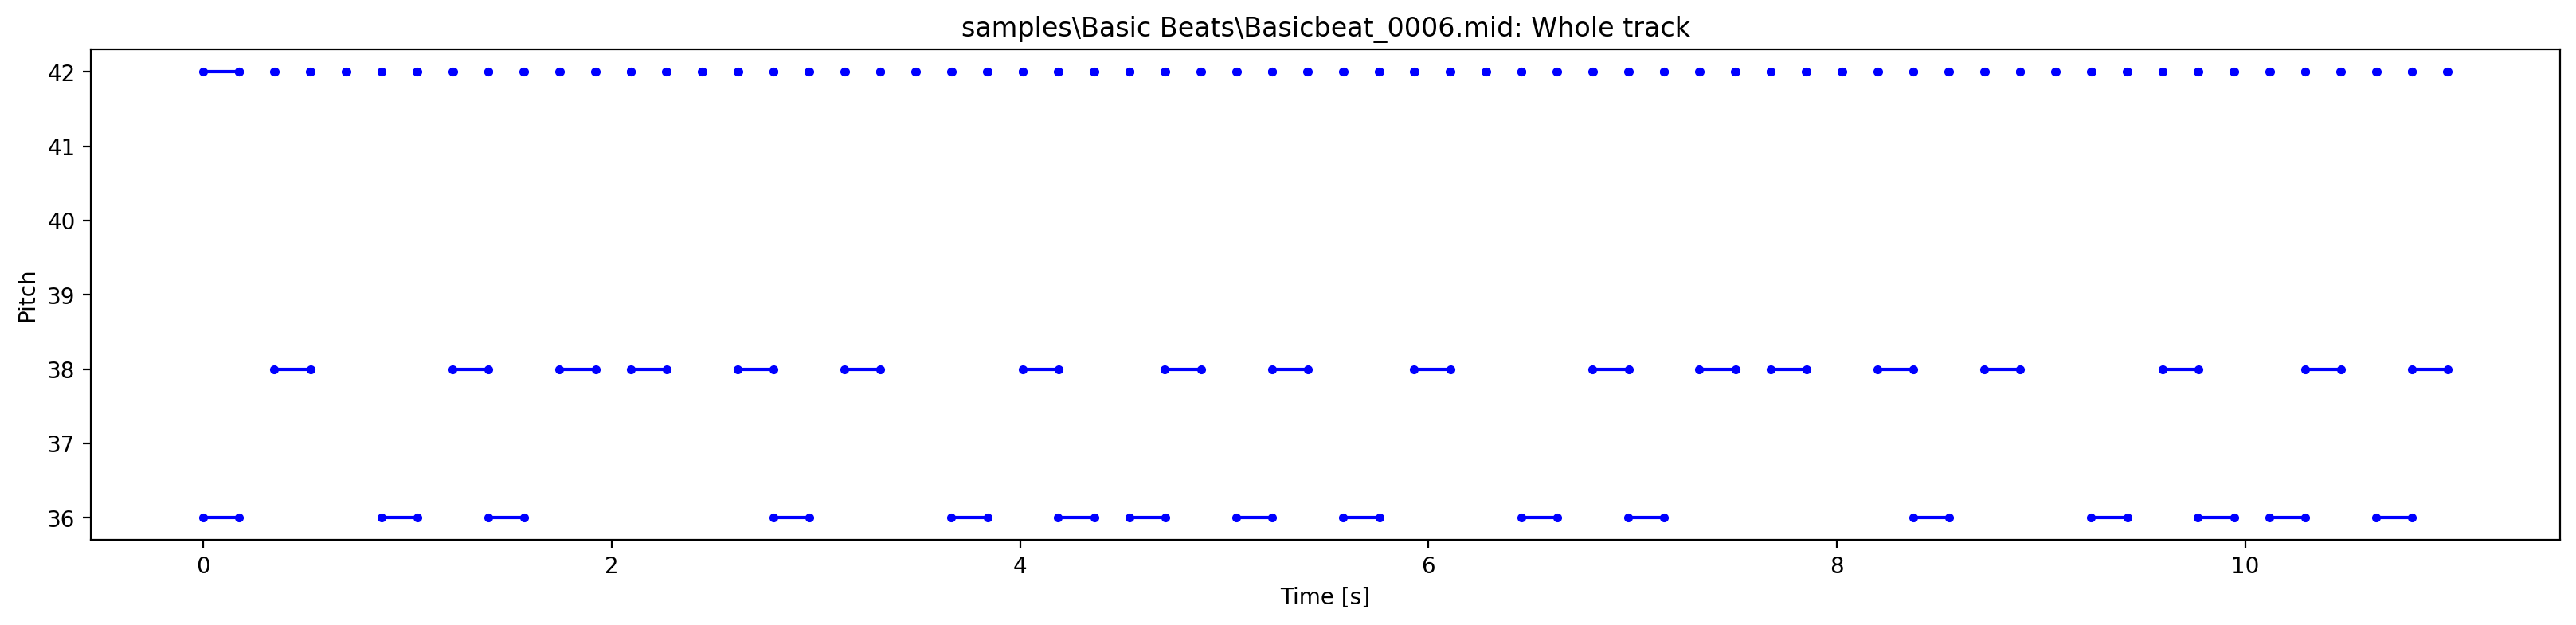

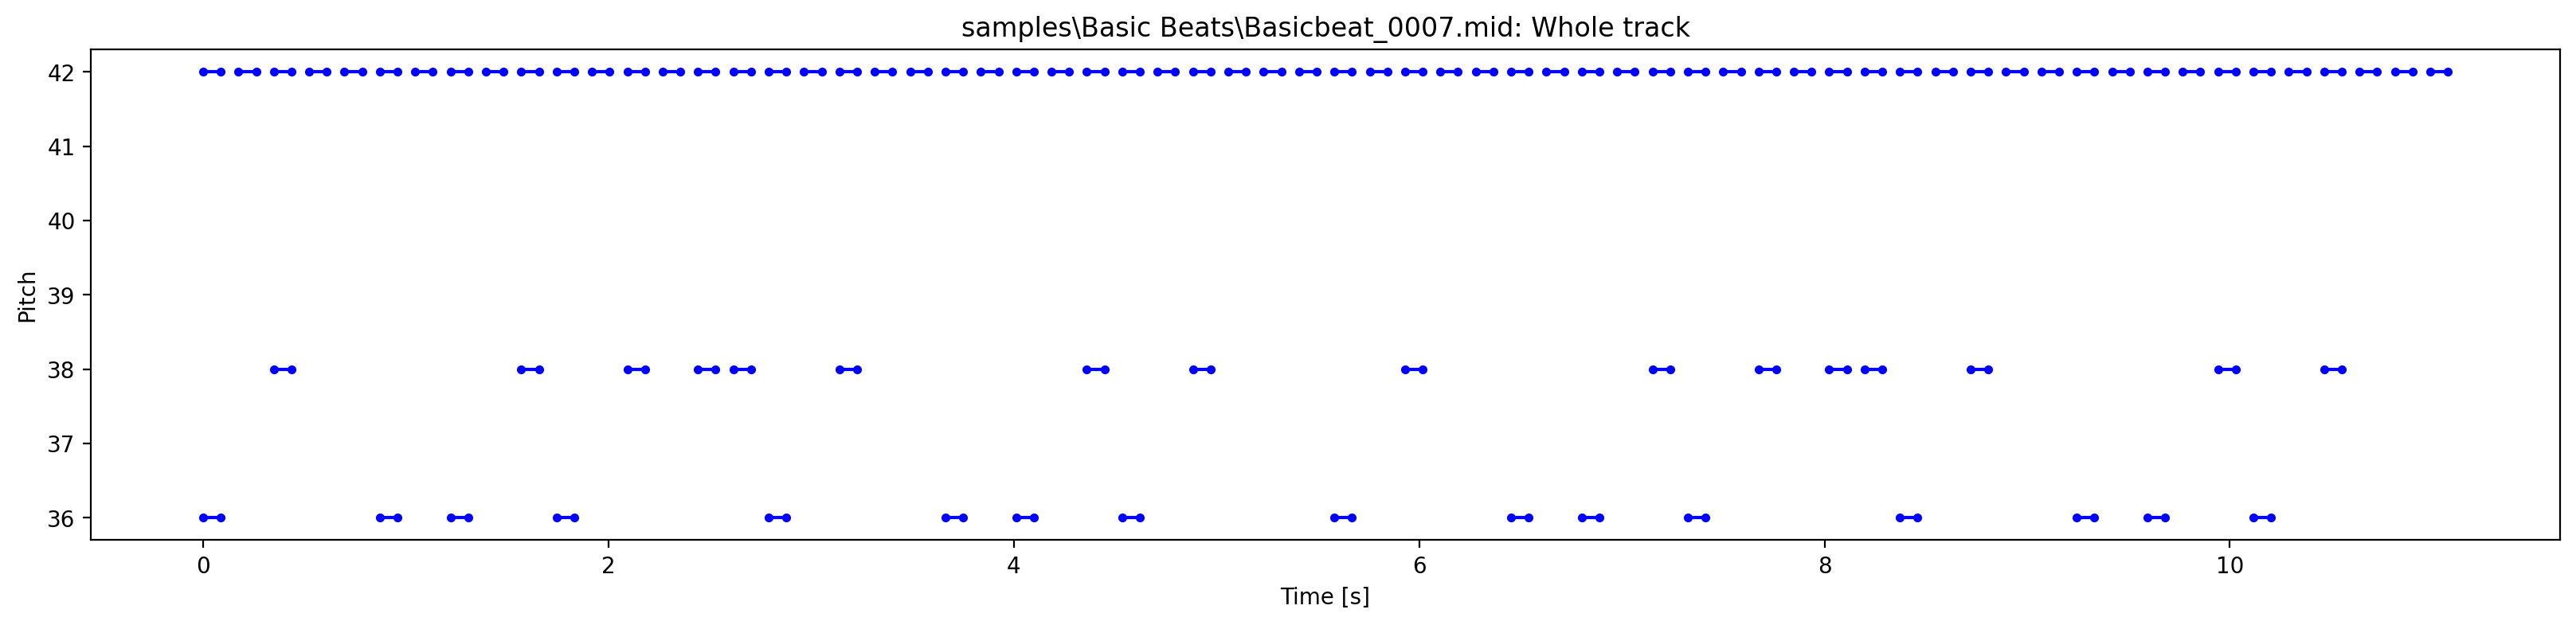

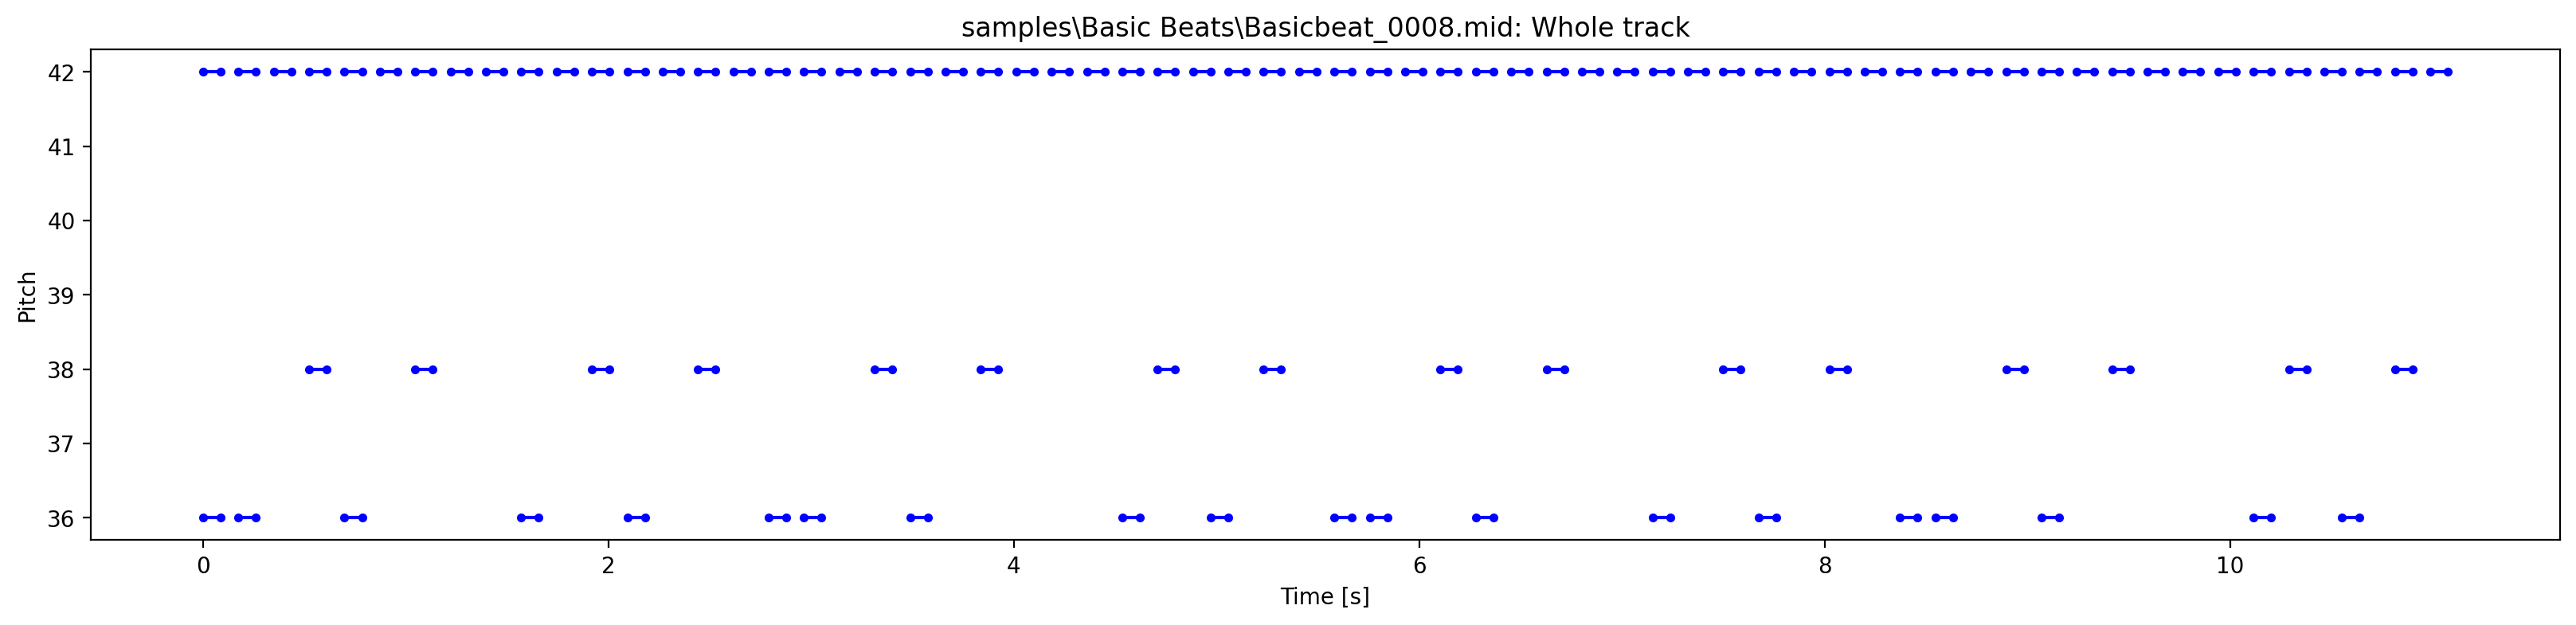

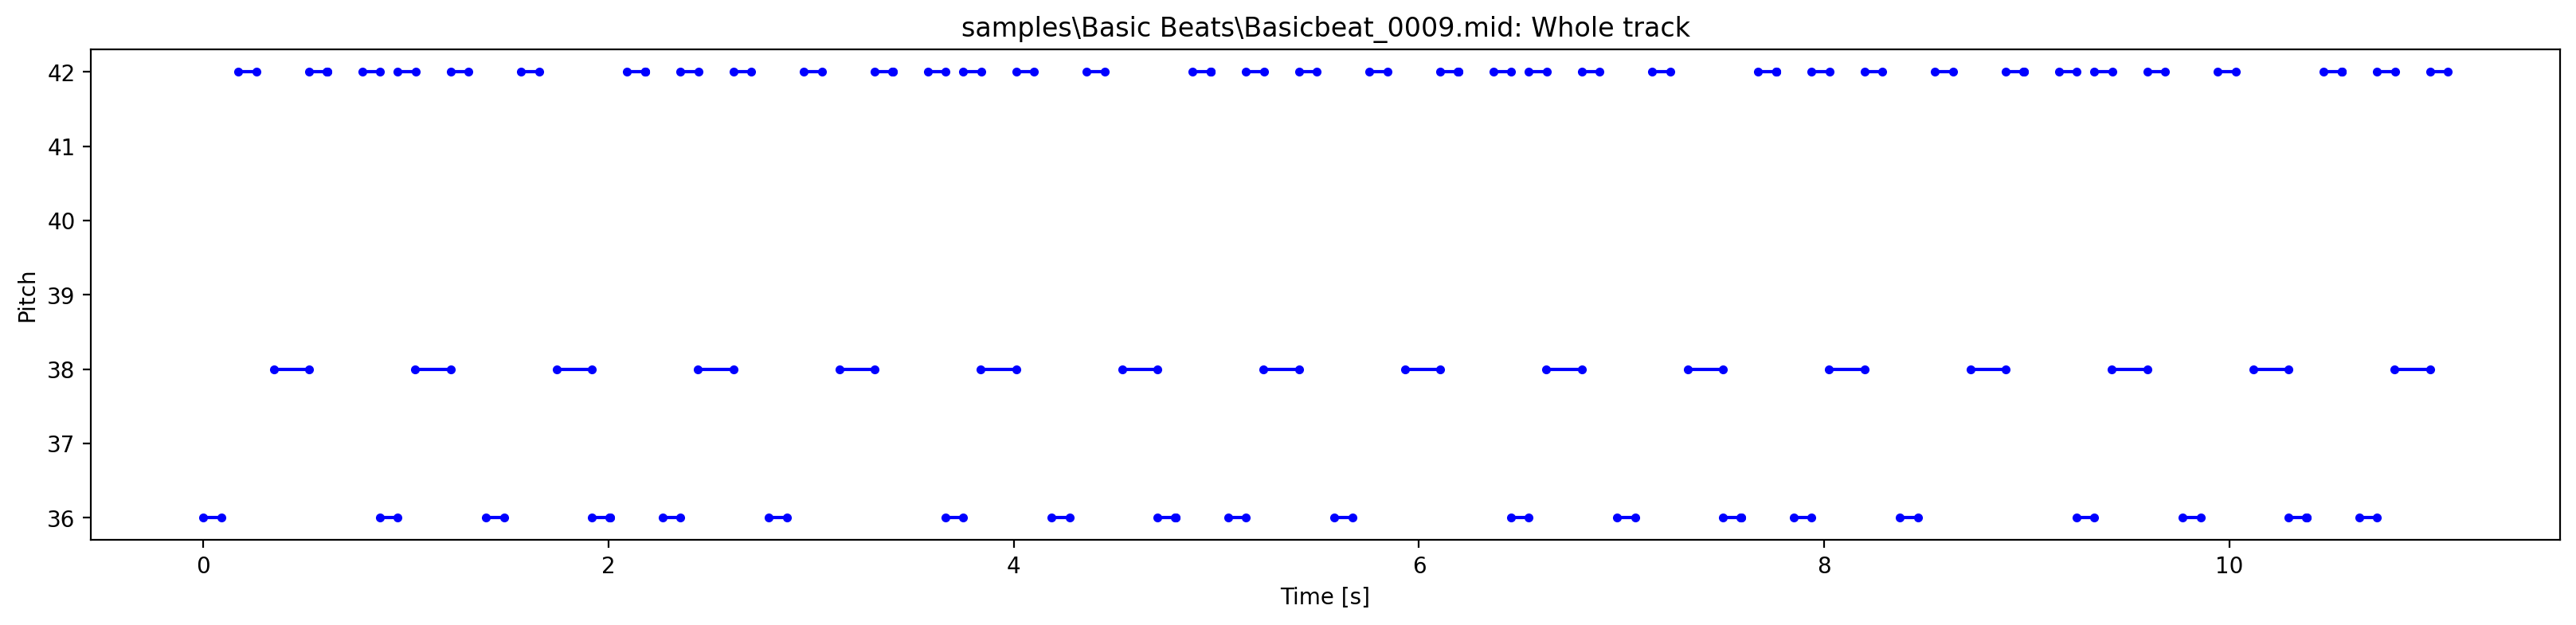

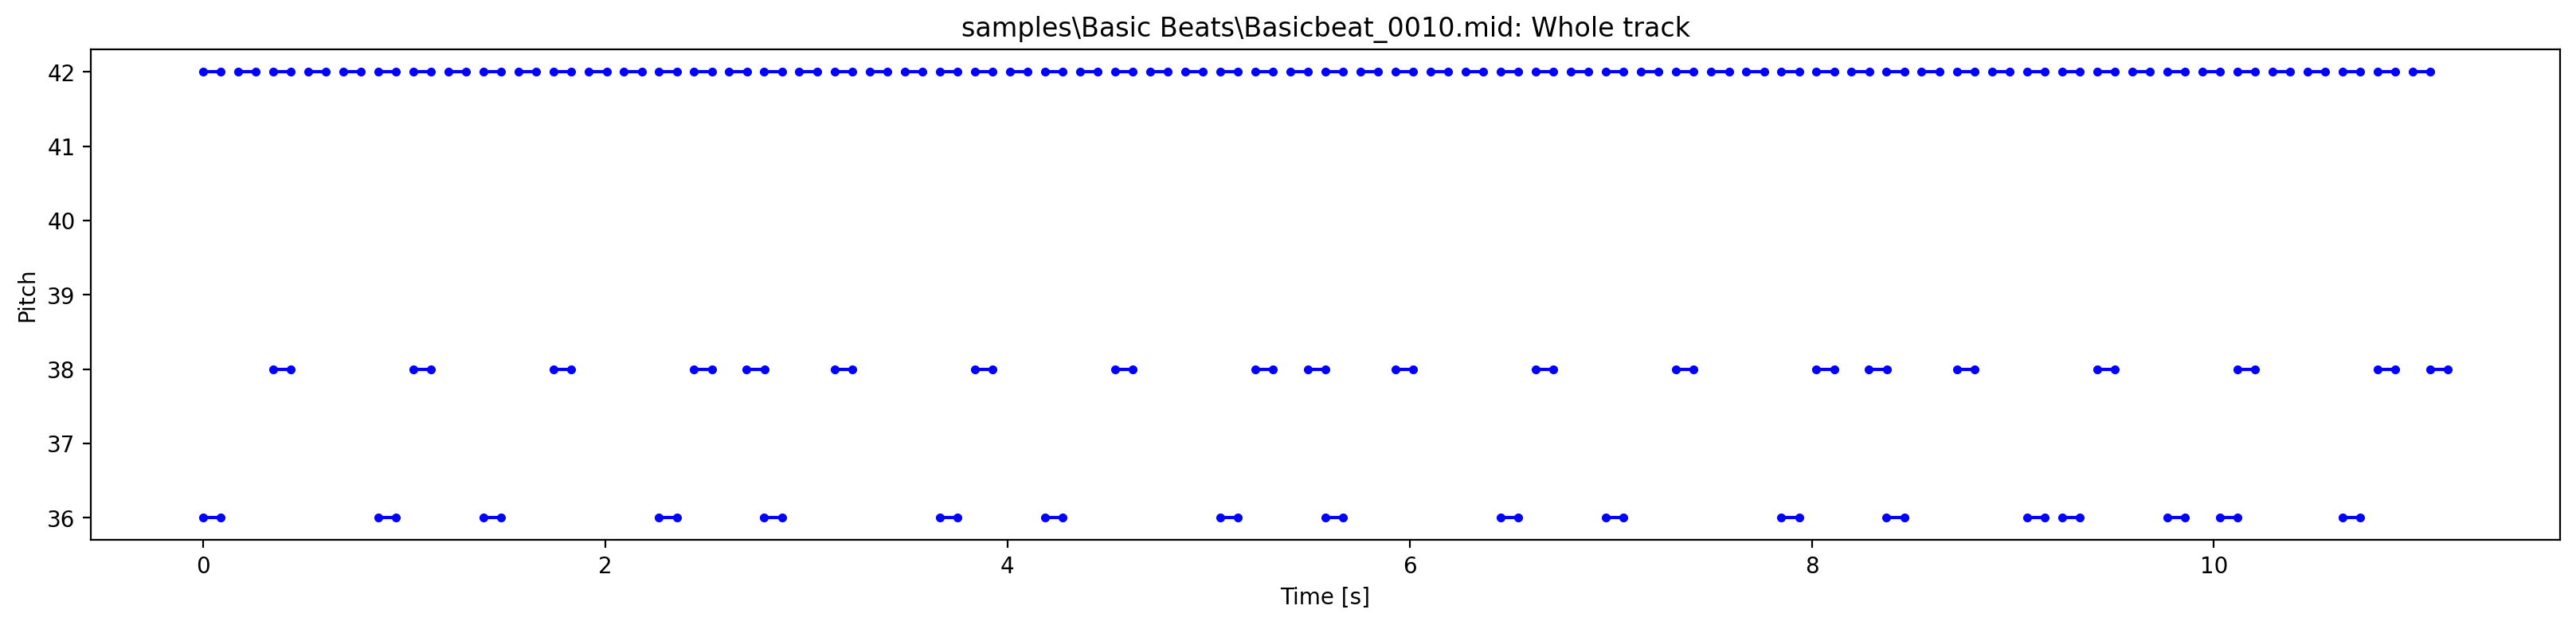

In [28]:
for filename in filenames:
    raw_notes = midi_to_notes(filename)
    plot_piano_roll(raw_notes)